# Apply rec-nition and attack

In [1]:
#install packages
!pip install pandas
!pip install pyarrow
!pip install torch
!pip install transformers
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# load in parquet file
import pandas as pd
twitter = pd.read_parquet('/Users/idahelenedencker/Desktop/all_danish_historical_tweets_3_with_keys.parquet', engine='pyarrow')

In [3]:
twitter

,conversation_id,lang,created_at,id,text,author_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,referenced_tweets_id,referenced_tweets_type,in_reply_to_user_id,__index_level_0__,PNR,surveyXact_externke,non_unique_twitter_author_id,started_survey
0,709678563000258560,sv,2016-03-15T09:52:09.000Z,709678563000258560,"\""De känner inte till verkligheten här ute\"" h...",4457540967,0,0,3,0,None,None,None,0,2602421662,DQTDC3CE1Z3C,0.0,0.0
1,685487760606625796,sv,2016-01-08T15:46:32.000Z,685487760606625796,Nej till att sälja parkering,4457540967,0,0,1,0,None,None,None,1,2602421662,DQTDC3CE1Z3C,0.0,0.0
2,367217340624019457,en,2013-08-13T17:19:43.000Z,367334662743392257,@DalaiLama ... and of the entire creation.,1665328796,0,0,0,0,367217340624019457,replied_to,20609518,0,2510602911,GSN1RE3W3D9V,0.0,1.0
3,93802066555842560,en,2011-07-20T21:58:50.000Z,93802066555842560,check out this article! I made $300 today! htt...,61058628,0,0,0,0,None,None,None,0,0409912877,MLCM2877ZCLD,0.0,0.0
4,93739791996301312,en,2011-07-20T17:51:22.000Z,93739791996301312,Local mam makes thousands/month from Home. vis...,61058628,0,0,0,0,None,None,None,1,0409912877,MLCM2877ZCLD,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285486,1261288653994819586,en,2020-05-15T13:33:43.000Z,1261288653994819586,RT @ANNAPICCINNI: HAVE your SAY! How the crisi...,23830917,7,0,0,0,1261288170701950976,retweeted,None,48,1006832160,G9PU63XFF25V,0.0,0.0
4285487,1256334955044458498,en,2020-05-02T13:50:29.000Z,1256581833766076419,"@ChrisEvans Hey @ChrisEvans, unfortunately peo...",23830917,0,0,0,0,1256334955044458498,replied_to,580097412,49,1006832160,G9PU63XFF25V,0.0,0.0
4285488,1245265953312714752,en,2020-04-01T08:25:13.000Z,1245265953312714752,The newest commentary from our team here at\n#...,23830917,2,0,5,0,None,None,None,50,1006832160,G9PU63XFF25V,0.0,0.0
4285489,1245062600116899842,en,2020-03-31T18:57:10.000Z,1245062600116899842,RT @Sara_Barragan: The UN calls for the immedi...,23830917,2,0,0,0,1245062381111250945,retweeted,None,51,1006832160,G9PU63XFF25V,0.0,0.0


- conversation_id: refers to the id of the original post
- lang: language
- created_at: when it was created (YYYY-MM-DDTHH:MM:SS.000Z, ISO8601 format giving: year, month, data at Time: hour:minute:second:milisecond in Coordinated Universal Time (UTC))
- id: same as conversation_id unless it is a replied_to
- text: the post, starts with @ if it is a retweet or reply to
- public_metrics.retweet_count: how many retweeted
- public_metrics.reply_count: how many replied
- public_metrics.like_count: how many liked
- public_metrics.quote_count: how many quoted
- referenced_tweets_id: what id this row is a reply or retweet of
- referenced_tweets_type: if it is a post (None), retweeted or replied_to
- in_reply_to_user_id: if it is a replied_to what is the user id of the reciever
- __index_level_0__: ??
- PNR: personnummer (Eentydig identifikation af person), like cpr
- surveyXact_externke: personification ID linked to the e-boks survey
- non_unique_twitter_author_id (made by simon): ?? can take 0 or 1
- started_survey (made by simon): if they started the e-boks survey (doesnt mean finished it) can take 0 or 1

In [4]:
#check langauges 
twitter['lang'].value_counts()[0:10]

# mostly english, danish, undetermined, swedish and norwegian 

lang
en     1875604
da     1315065
und     293511
sv      164194
no      102828
de       84820
es       76568
ru       62478
nl       58366
tl       34096
Name: count, dtype: int64

In [5]:
#filter to only danish 
danish = twitter[twitter['lang'] == 'da']
danish
#1.315.065 tweets

,conversation_id,lang,created_at,id,text,author_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,referenced_tweets_id,referenced_tweets_type,in_reply_to_user_id,__index_level_0__,PNR,surveyXact_externke,non_unique_twitter_author_id,started_survey
22,688493617502093312,da,2016-01-16T22:50:44.000Z,688493617502093312,RT @UMBorgerservice: Angreb i Ouagadougou. Amb...,3492067815,8,0,0,0,688127028785094657,retweeted,None,0,1511782984,3XCSPZMVPM9Y,0.0,0.0
36,259192974976630784,da,2012-10-19T07:23:15.000Z,259192974976630784,se ledige stillinger http://t.co/uHu9ydcX,205170718,0,0,0,0,None,None,None,13,2807531401,TMC3FSZ13CCY,0.0,0.0
41,488022378098995200,da,2014-07-12T18:09:36.000Z,488022378098995200,@alicehargest96 \nkan du huske mig fra kandersteg,856190408,0,0,0,0,None,None,2341036221,3,2009980973,FQ4TX1E23YCU,0.0,0.0
53,1171077405877948416,da,2019-09-09T15:06:25.000Z,1171077405877948416,Vorbasse,1170630359156953090,0,0,0,0,None,None,None,2,None,None,NaN,NaN
98,656716588528209920,da,2015-10-21T06:25:53.000Z,656718027140919296,@KristianDuch @jyllandsposten ja lige ved og n...,3047200425,0,0,0,0,656716588528209920,replied_to,1911496490,35,0704732791,MV1HVXXWF17V,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285434,1375013343027720192,da,2021-03-25T09:15:02.000Z,1375013343027720192,RT @VILLUMFONDEN: Verden har brug for endnu fl...,1348967453867573252,6,0,0,0,1374796226265288706,retweeted,None,0,None,None,NaN,NaN
4285435,1375013201344102401,da,2021-03-25T09:14:28.000Z,1375013201344102401,RT @VILLUMFONDEN: Science i fritiden: Se 8 sej...,1348967453867573252,4,0,0,0,1375005761093390341,retweeted,None,1,None,None,NaN,NaN
4285436,1366700417699229698,da,2021-03-02T10:42:26.000Z,1366700417699229698,RT @VILLUMFONDEN: Er du interesseret i digital...,1348967453867573252,2,0,0,0,1364939051267162112,retweeted,None,2,None,None,NaN,NaN
4285437,1364939051267162112,da,2021-03-02T10:39:32.000Z,1366699688410435585,@VILLUMFONDEN @VIAuniversity @AarhusUni @Epini...,1348967453867573252,0,0,0,0,1364939051267162112,replied_to,803171312063643648,3,None,None,NaN,NaN


In [6]:
#check for duplicate rows

# Identify duplicate rows
duplicates_danish = danish.duplicated(keep=False)  # keep=False marks all duplicates as True

# Filter the DataFrame to get only the duplicate rows
duplicate_rows_danish = danish[duplicates_danish]

print("Duplicate rows:")
print(duplicate_rows_danish)

#there are no duplicate rows

Duplicate rows:
Empty DataFrame
Columns: [conversation_id, lang, created_at, id, text, author_id, public_metrics.retweet_count, public_metrics.reply_count, public_metrics.like_count, public_metrics.quote_count, referenced_tweets_id, referenced_tweets_type, in_reply_to_user_id, __index_level_0__, PNR, surveyXact_externke, non_unique_twitter_author_id, started_survey]
Index: []


In [7]:
# devide danish twitter data into 2 parts (since each algorithm is taking approx. 24h to run, data is devided into two, to prevent all data from being lost if the session crash)

# Calculate the midpoint
midpoint = len(danish) // 2

# Split the data
danish_part_1 = danish.iloc[:midpoint]
danish_part_2 = danish.iloc[midpoint:]

danish_part_2

,conversation_id,lang,created_at,id,text,author_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,referenced_tweets_id,referenced_tweets_type,in_reply_to_user_id,__index_level_0__,PNR,surveyXact_externke,non_unique_twitter_author_id,started_survey
2570137,881573110721466368,da,2017-07-02T17:59:43.000Z,881573110721466368,Da LVG praktiserede underholdende og flot fodb...,3673755735,0,0,0,0,None,None,None,325,2402902313,8QFKJTYD81GV,0.0,0.0
2570139,880834154455330817,da,2017-06-30T17:03:22.000Z,880834154455330817,Legende kamp ml. #Barca og #MUFC lille udvalg ...,3673755735,0,0,0,0,None,None,None,327,2402902313,8QFKJTYD81GV,0.0,0.0
2570141,880375355080572929,da,2017-06-29T10:40:15.000Z,880375355080572929,RT @dsvensson25: Så er der ingen vej uden om.....,3673755735,2,0,0,0,880340488666189824,retweeted,None,329,2402902313,8QFKJTYD81GV,0.0,0.0
2570142,880052403285794818,da,2017-06-28T15:12:17.000Z,880081424786837504,"@MortenGlinvad Tillykke, Morten. Bliver spænde...",3673755735,0,1,0,0,880052481643995136,replied_to,1619967589,330,2402902313,8QFKJTYD81GV,0.0,0.0
2570146,879304040194211840,da,2017-06-26T11:43:14.000Z,879304040194211840,Ung som gammel. Fin hyldest på Rådhuspladsen t...,3673755735,0,0,0,0,None,None,None,334,2402902313,8QFKJTYD81GV,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285434,1375013343027720192,da,2021-03-25T09:15:02.000Z,1375013343027720192,RT @VILLUMFONDEN: Verden har brug for endnu fl...,1348967453867573252,6,0,0,0,1374796226265288706,retweeted,None,0,None,None,NaN,NaN
4285435,1375013201344102401,da,2021-03-25T09:14:28.000Z,1375013201344102401,RT @VILLUMFONDEN: Science i fritiden: Se 8 sej...,1348967453867573252,4,0,0,0,1375005761093390341,retweeted,None,1,None,None,NaN,NaN
4285436,1366700417699229698,da,2021-03-02T10:42:26.000Z,1366700417699229698,RT @VILLUMFONDEN: Er du interesseret i digital...,1348967453867573252,2,0,0,0,1364939051267162112,retweeted,None,2,None,None,NaN,NaN
4285437,1364939051267162112,da,2021-03-02T10:39:32.000Z,1366699688410435585,@VILLUMFONDEN @VIAuniversity @AarhusUni @Epini...,1348967453867573252,0,0,0,0,1364939051267162112,replied_to,803171312063643648,3,None,None,NaN,NaN


## Applying rec-nition 

In [10]:
#rec-nition on part 1 data

#add rec-nition model to ‘text’ column: produces binary class: anderkendende/ikke-anerkendende:
# 0 = ikke-anerkendende 
# 1 = anerkendende

from tqdm import tqdm
import numpy as np
import os
import torch


# Change working directory
os.chdir('/Users/idahelenedencker/Desktop/STANDBY_Ida/Facebook Field Study with Local Politicians/Scripts/Rec-nition')

# Print contents of the working directory
contents = os.listdir(os.getcwd())
print("Contents of the Working Directory:")
for item in contents:
    print(item)

from transformers import AutoTokenizer
from model_def import ElectraClassifier

def load_model():
    model_checkpoint = 'Maltehb/aelaectra-danish-electra-small-cased'
    tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)
    model = ElectraClassifier(model_checkpoint, 2)
    model_path = 'pytorch_model.bin'
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')), strict=False)
    model.eval()
    return model, tokenizer

def make_prediction(text):
    try:
        tokenized_text = tokenizer(
            text,
            truncation=True,
            max_length=512,
            padding='max_length',
            return_attention_mask=True,
            return_token_type_ids=False,
            return_tensors='pt',
        )
        input_ids = tokenized_text['input_ids']
        attention_masks = tokenized_text['attention_mask']
        logits = model(input_ids, attention_masks)

        logit, preds = torch.max(logits, dim=1)
        return int(preds)
    except Exception as e:
        print(f"Error occurred: {e}")
        return None  # or handle the error as needed

# Load model and tokenizer
model, tokenizer = load_model()

# Make text into list
text = [str(i) for i in danish_part_1['text'].tolist()]

# Initialize list to store labels
recnit_scores = []

# Iterate over text with tqdm progress bar
for i, single_text in enumerate(tqdm(text, desc="Extracting rec-nition scores")):
    try:
        label = make_prediction(single_text)
        if label is not None:
            recnit_scores.append(label)
        else:
            recnit_scores.append(np.nan)  # or any placeholder for missing data
    except Exception as e:
        print(f"Error occurred on row {i}: {e}")
        recnit_scores.append(np.nan)  # or any placeholder for missing data

# Assign rec-nition scores to dataframe
danish_part_1['rec-nition'] = np.array(recnit_scores)

# Save the dataframe that now has rec-nition scores
danish_part_1.to_csv('/Users/idahelenedencker/Desktop/STANDBY_Ida/Rec-nition and attack on twitter data/CSV files/twitter_w_rec_part1.csv', index=False)


Contents of the Working Directory:
LICENSE.md
model_def.py
definitioner.pdf
__pycache__
README.md
data_prep.py
pytorch_model.bin
.ipynb_checkpoints


Extracting rec-nition scores:   4%|▍          | 42/1000 [00:02<01:03, 15.05it/s]


KeyboardInterrupt: 

In [ ]:
#rec-nition on part 2 data

#add rec-nition model to ‘text’ column: produces binary class: anderkendende/ikke-anerkendende:
# 0 = ikke-anerkendende 
# 1 = anerkendende

from tqdm import tqdm
import numpy as np
import os
import torch


# Change working directory
os.chdir('/Users/idahelenedencker/Desktop/STANDBY_Ida/Facebook Field Study with Local Politicians/Scripts/Rec-nition')

# Print contents of the working directory
contents = os.listdir(os.getcwd())
print("Contents of the Working Directory:")
for item in contents:
    print(item)

from transformers import AutoTokenizer
from model_def import ElectraClassifier

def load_model():
    model_checkpoint = 'Maltehb/aelaectra-danish-electra-small-cased'
    tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)
    model = ElectraClassifier(model_checkpoint, 2)
    model_path = 'pytorch_model.bin'
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')), strict=False)
    model.eval()
    return model, tokenizer

def make_prediction(text):
    try:
        tokenized_text = tokenizer(
            text,
            truncation=True,
            max_length=512,
            padding='max_length',
            return_attention_mask=True,
            return_token_type_ids=False,
            return_tensors='pt',
        )
        input_ids = tokenized_text['input_ids']
        attention_masks = tokenized_text['attention_mask']
        logits = model(input_ids, attention_masks)

        logit, preds = torch.max(logits, dim=1)
        return int(preds)
    except Exception as e:
        print(f"Error occurred: {e}")
        return None  # or handle the error as needed

# Load model and tokenizer
model, tokenizer = load_model()

# Make text into list
text = [str(i) for i in danish_part_2['text'].tolist()]

# Initialize list to store labels
recnit_scores = []

# Iterate over text with tqdm progress bar
for i, single_text in enumerate(tqdm(text, desc="Extracting rec-nition scores")):
    try:
        label = make_prediction(single_text)
        if label is not None:
            recnit_scores.append(label)
        else:
            recnit_scores.append(np.nan)  # or any placeholder for missing data
    except Exception as e:
        print(f"Error occurred on row {i}: {e}")
        recnit_scores.append(np.nan)  # or any placeholder for missing data

# Assign rec-nition scores to dataframe
danish_part_2['rec-nition'] = np.array(recnit_scores)

# Save the dataframe that now has rec-nition scores
danish_part_2.to_csv('/Users/idahelenedencker/Desktop/STANDBY_Ida/Rec-nition and attack on twitter data/CSV files/twitter_w_rec_part2.csv', index=False)

Contents of the Working Directory:
LICENSE.md
model_def.py
definitioner.pdf
__pycache__
README.md
data_prep.py
pytorch_model.bin
.ipynb_checkpoints


Extracting rec-nition scores:   6%| | 76445/1315065 [1:26:58<23:26:17, 14.68it/s

In [8]:
# merging part 1 and 2

# Read the first CSV file
df1 = pd.read_csv('/Users/idahelenedencker/Desktop/STANDBY_Ida/Rec-nition and attack on twitter data/CSV files/twitter_w_rec_part1.csv')

# Read the second CSV file
df2 = pd.read_csv('/Users/idahelenedencker/Desktop/STANDBY_Ida/Rec-nition and attack on twitter data/CSV files/twitter_w_rec_part2.csv')

# Concatenate the DataFrames vertically
merged_df = pd.concat([df1, df2], axis=0)

# Save the concatenated DataFrame to a new CSV file
merged_df.to_csv('/Users/idahelenedencker/Desktop/STANDBY_Ida/Rec-nition and attack on twitter data/CSV files/twitter_w_rec_merged.csv', index=False)

/var/folders/ds/0d9wxy210kx_fvknqn3hcg_h0000gn/T/ipykernel_18569/2142675882.py:4: DtypeWarning: Columns (0,7,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/idahelenedencker/Desktop/STANDBY_Ida/Rec-nition and attack on twitter data/CSV files/twitter_w_rec_part1.csv')
/var/folders/ds/0d9wxy210kx_fvknqn3hcg_h0000gn/T/ipykernel_18569/2142675882.py:7: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/Users/idahelenedencker/Desktop/STANDBY_Ida/Rec-nition and attack on twitter data/CSV files/twitter_w_rec_part2.csv')


In [9]:
#investigating the df1

#lenght
len(df1.index)
len(danish_part_1.index)
len(df1.index) - len(danish_part_1.index)
#the new df has 51613 more rows...


#check for duplicates
# Identify duplicate rows
duplicates_df1 = df1.duplicated(keep=False)  # keep=False marks all duplicates as True

# Filter the DataFrame to get only the duplicate rows
duplicate_rows_df1 = df1[duplicates_df1]

print(duplicate_rows_df1)

#there are 51569 duplicate rows...


#check value counts
df1['rec-nition'].value_counts(dropna=False) #51654 NA's

           conversation_id lang                created_at            id  \
505486  861113028300996608   da  2017-05-07T06:58:39.000Z  8.611130e+17   
505487  861113028300996608   da  2017-05-07T06:58:39.000Z  8.611130e+17   
505488  861113028300996608   da  2017-05-07T06:58:39.000Z  8.611130e+17   
505489  861113028300996608   da  2017-05-07T06:58:39.000Z  8.611130e+17   
505490  861113028300996608   da  2017-05-07T06:58:39.000Z  8.611130e+17   
...                    ...  ...                       ...           ...   
557051  861112950525919232   da  2017-05-07T06:58:20.000Z  8.611130e+17   
557052  861112950525919232   da  2017-05-07T06:58:20.000Z  8.611130e+17   
557053  861112950525919232   da  2017-05-07T06:58:20.000Z  8.611130e+17   
557054  861112950525919232   da  2017-05-07T06:58:20.000Z  8.611130e+17   
557055  861112950525919232   da  2017-05-07T06:58:20.000Z  8.611130e+17   

                   text  author_id  public_metrics.retweet_count  \
505486  @MedianoFodbold        

rec-nition
0.0    556487
1.0    101004
NaN     51654
Name: count, dtype: int64

In [10]:
#investigating the df2

#lenght
len(df2.index)
len(danish_part_2.index)
len(df2.index) - len(danish_part_2.index)
#the new df has 8 more rows


#check for duplicates
# Identify duplicate rows
duplicates_df2 = df2.duplicated(keep=False)  # keep=False marks all duplicates as True

# Filter the DataFrame to get only the duplicate rows
duplicate_rows_df2 = df2[duplicates_df2]

print(duplicate_rows_df2)

#there are no duplicate rows


#check value counts
df2['rec-nition'].value_counts(dropna=False) #13 NA's

Empty DataFrame
Columns: [conversation_id, lang, created_at, id, text, author_id, public_metrics.retweet_count, public_metrics.reply_count, public_metrics.like_count, public_metrics.quote_count, referenced_tweets_id, referenced_tweets_type, in_reply_to_user_id, __index_level_0__, PNR, surveyXact_externke, non_unique_twitter_author_id, started_survey, rec-nition]
Index: []


rec-nition
0.0    548499
1.0    109029
NaN        13
Name: count, dtype: int64

In [11]:
# read in file that has rec-nition and split data into 2
df_w_rec = pd.read_csv('/Users/idahelenedencker/Desktop/STANDBY_Ida/Rec-nition and attack on twitter data/CSV files/twitter_w_rec_merged.csv')

len(df_w_rec.index)- len(danish.index)
#the scored df have 51.621 more rows than the original df, where 51613 are from part1 run, 8 from part2 run

# Identify duplicate rows
duplicates = df_w_rec.duplicated(keep=False)  # keep=False marks all duplicates as True

# Filter the DataFrame to get only the duplicate rows
duplicate_rows = df_w_rec[duplicates]

print("Duplicate rows:")
print(duplicate_rows)

#51569 are duplicate rows 

/var/folders/ds/0d9wxy210kx_fvknqn3hcg_h0000gn/T/ipykernel_18569/2106653319.py:2: DtypeWarning: Columns (0,7,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_w_rec = pd.read_csv('/Users/idahelenedencker/Desktop/STANDBY_Ida/Rec-nition and attack on twitter data/CSV files/twitter_w_rec_merged.csv')


Duplicate rows:
           conversation_id lang                created_at            id  \
505486  861113028300996608   da  2017-05-07T06:58:39.000Z  8.611130e+17   
505487  861113028300996608   da  2017-05-07T06:58:39.000Z  8.611130e+17   
505488  861113028300996608   da  2017-05-07T06:58:39.000Z  8.611130e+17   
505489  861113028300996608   da  2017-05-07T06:58:39.000Z  8.611130e+17   
505490  861113028300996608   da  2017-05-07T06:58:39.000Z  8.611130e+17   
...                    ...  ...                       ...           ...   
557051  861112950525919232   da  2017-05-07T06:58:20.000Z  8.611130e+17   
557052  861112950525919232   da  2017-05-07T06:58:20.000Z  8.611130e+17   
557053  861112950525919232   da  2017-05-07T06:58:20.000Z  8.611130e+17   
557054  861112950525919232   da  2017-05-07T06:58:20.000Z  8.611130e+17   
557055  861112950525919232   da  2017-05-07T06:58:20.000Z  8.611130e+17   

                   text  author_id  public_metrics.retweet_count  \
505486  @Median

## Applying attack

In [12]:
# devide the merged data (that has rec-scores) into 2 parts

# Calculate the midpoint
midpoint = len(df_w_rec) // 2

# Split the data
merged_part_1 = df_w_rec.iloc[:midpoint]
merged_part_2 = df_w_rec.iloc[midpoint:]

merged_part_1

,conversation_id,lang,created_at,id,text,author_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,referenced_tweets_id,referenced_tweets_type,in_reply_to_user_id,__index_level_0__,PNR,surveyXact_externke,non_unique_twitter_author_id,started_survey,rec-nition
0,688493617502093312,da,2016-01-16T22:50:44.000Z,6.884936e+17,RT @UMBorgerservice: Angreb i Ouagadougou. Amb...,3.492068e+09,8.0,0,0.0,0.0,6.881270e+17,retweeted,NaN,0.0,1.511783e+09,3XCSPZMVPM9Y,0.0,0.0,0.0
1,259192974976630784,da,2012-10-19T07:23:15.000Z,2.591930e+17,se ledige stillinger http://t.co/uHu9ydcX,2.051707e+08,0.0,0,0.0,0.0,NaN,NaN,NaN,13.0,2.807531e+09,TMC3FSZ13CCY,0.0,0.0,0.0
2,488022378098995200,da,2014-07-12T18:09:36.000Z,4.880224e+17,@alicehargest96 \nkan du huske mig fra kandersteg,8.561904e+08,0.0,0,0.0,0.0,NaN,NaN,2.341036e+09,3.0,2.009981e+09,FQ4TX1E23YCU,0.0,0.0,0.0
3,1171077405877948416,da,2019-09-09T15:06:25.000Z,1.171077e+18,Vorbasse,1.170630e+18,0.0,0,0.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,0.0
4,656716588528209920,da,2015-10-21T06:25:53.000Z,6.567180e+17,@KristianDuch @jyllandsposten ja lige ved og n...,3.047200e+09,0.0,0,0.0,0.0,6.567166e+17,replied_to,1.911496e+09,35.0,7.047328e+08,MV1HVXXWF17V,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683338,1224399922377691137,da,2020-02-03T18:31:43.000Z,1.224400e+18,@CrackBaby1312 Hvem er skadet? Så kun de misse...,1.166986e+08,0.0,0,0.0,0.0,1.224400e+18,replied_to,7.894445e+08,12.0,1.505691e+09,XGTP7SGV65EV,0.0,0.0,0.0
683339,1222811648760721410,da,2020-01-31T19:18:38.000Z,1.223325e+18,@Patrick_7400 Tillykke koster ca 1.000.000 ind...,1.166986e+08,0.0,0,0.0,0.0,1.222812e+18,replied_to,8.844461e+08,13.0,1.505691e+09,XGTP7SGV65EV,0.0,0.0,0.0
683340,1222939873960714241,da,2020-01-30T17:50:55.000Z,1.222940e+18,@CrackBaby1312 Surt hvis han ender i fcm så bl...,1.166986e+08,0.0,0,0.0,0.0,1.222940e+18,replied_to,7.894445e+08,14.0,1.505691e+09,XGTP7SGV65EV,0.0,0.0,0.0
683341,1221894045271830528,da,2020-01-27T21:15:01.000Z,1.221904e+18,@TheElholm @CrackBaby1312 Uhhh jeg hører Messi...,1.166986e+08,0.0,0,1.0,0.0,1.221897e+18,replied_to,3.329624e+08,15.0,1.505691e+09,XGTP7SGV65EV,0.0,0.0,0.0


In [ ]:
#attack on part 1 data 

#add attack model to ‘text’ column: produces binary class: sprogligt angreb/ikke sprogligt angreb:
# 0 = ikke sprogligt angreb
# 1 = sprogligt angreb

from tqdm import tqdm
import numpy as np
import torch
from transformers import AutoTokenizer

# Change working directory
import os
os.chdir('/Users/idahelenedencker/Desktop/STANDBY_Ida/Facebook Field Study with Local Politicians/Scripts/A-ttack')

# Print contents of the working directory to check 
contents = os.listdir(os.getcwd())
print("Contents of the Working Directory:")
for item in contents:
    print(item)

from model_def import ElectraClassifier

def load_model():
    model_checkpoint = 'Maltehb/aelaectra-danish-electra-small-cased'
    tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)
    model = ElectraClassifier(model_checkpoint, 2)
    model_path = 'pytorch_model.bin'
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')), strict=False)
    model.eval()
    return model, tokenizer

def make_prediction(text):
    try:
        tokenized_text = tokenizer(
            text,
            truncation=True,
            max_length=512,
            padding='max_length',
            return_attention_mask=True,
            return_token_type_ids=False,
            return_tensors='pt',
        )
        input_ids = tokenized_text['input_ids']
        attention_masks = tokenized_text['attention_mask']
        logits = model(input_ids, attention_masks)

        logit, preds = torch.max(logits, dim=1)
        return int(preds)
    except Exception as e:
        print(f"Error occurred: {e}")
        return None  # or handle the error as needed

# Load model and tokenizer
model, tokenizer = load_model()

# Make text into list
text = [str(i) for i in merged_part_1['text'].tolist()]

# Initialize list to store labels
attack_scores = []

# Iterate over text with tqdm progress bar
for i, single_text in enumerate(tqdm(text, desc="Extracting attack scores")):
    try:
        label = make_prediction(single_text)
        if label is not None:
            attack_scores.append(label)
        else:
            attack_scores.append(np.nan)  # or any placeholder for missing data
    except Exception as e:
        print(f"Error occurred on row {i}: {e}")
        attack_scores.append(np.nan)  # or any placeholder for missing data

# Assign attack scores to dataframe
merged_part_1['attack'] = np.array(attack_scores)

# Save the dataframe with rec-nition and attack scores
merged_part_1.to_csv('/Users/idahelenedencker/Desktop/STANDBY_Ida/Rec-nition and attack on twitter data/CSV files/twitter_w_rec_attack_part1.csv', index=False)

In [ ]:
#attack on part 2 data

#add attack model to ‘text’ column: produces binary class: sprogligt angreb/ikke sprogligt angreb:
# 0 = ikke sprogligt angreb
# 1 = sprogligt angreb

from tqdm import tqdm
import numpy as np
import torch
from transformers import AutoTokenizer

# Change working directory
import os
os.chdir('/Users/idahelenedencker/Desktop/STANDBY_Ida/Facebook Field Study with Local Politicians/Scripts/A-ttack')

# Print contents of the working directory to check 
contents = os.listdir(os.getcwd())
print("Contents of the Working Directory:")
for item in contents:
    print(item)

from model_def import ElectraClassifier

def load_model():
    model_checkpoint = 'Maltehb/aelaectra-danish-electra-small-cased'
    tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)
    model = ElectraClassifier(model_checkpoint, 2)
    model_path = 'pytorch_model.bin'
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')), strict=False)
    model.eval()
    return model, tokenizer

def make_prediction(text):
    try:
        tokenized_text = tokenizer(
            text,
            truncation=True,
            max_length=512,
            padding='max_length',
            return_attention_mask=True,
            return_token_type_ids=False,
            return_tensors='pt',
        )
        input_ids = tokenized_text['input_ids']
        attention_masks = tokenized_text['attention_mask']
        logits = model(input_ids, attention_masks)

        logit, preds = torch.max(logits, dim=1)
        return int(preds)
    except Exception as e:
        print(f"Error occurred: {e}")
        return None  # or handle the error as needed

# Load model and tokenizer
model, tokenizer = load_model()

# Make text into list
text = [str(i) for i in merged_part_2['text'].tolist()]

# Initialize list to store labels
attack_scores = []

# Iterate over text with tqdm progress bar
for i, single_text in enumerate(tqdm(text, desc="Extracting attack scores")):
    try:
        label = make_prediction(single_text)
        if label is not None:
            attack_scores.append(label)
        else:
            attack_scores.append(np.nan)  # or any placeholder for missing data
    except Exception as e:
        print(f"Error occurred on row {i}: {e}")
        attack_scores.append(np.nan)  # or any placeholder for missing data

# Assign attack scores to dataframe
merged_part_2['attack'] = np.array(attack_scores)

# Save the dataframe with rec-nition and attack scores
merged_part_2.to_csv('/Users/idahelenedencker/Desktop/STANDBY_Ida/Rec-nition and attack on twitter data/CSV files/twitter_w_rec_attack_part2.csv', index=False)

In [13]:
# merging part 1 and 2

# Read the first CSV file
both_1 = pd.read_csv('/Users/idahelenedencker/Desktop/STANDBY_Ida/Rec-nition and attack on twitter data/CSV files/twitter_w_rec_attack_part1.csv')

# Read the second CSV file
both_2 = pd.read_csv('/Users/idahelenedencker/Desktop/STANDBY_Ida/Rec-nition and attack on twitter data/CSV files/twitter_w_rec_attack_part2.csv')

# Concatenate the DataFrames vertically
merged_df_both = pd.concat([both_1, both_2], axis=0)

# Save the concatenated DataFrame to a new CSV file
merged_df_both.to_csv('/Users/idahelenedencker/Desktop/STANDBY_Ida/Rec-nition and attack on twitter data/CSV files/twitter_w_rec_attack_merged.csv', index=False)

/var/folders/ds/0d9wxy210kx_fvknqn3hcg_h0000gn/T/ipykernel_18569/585822806.py:4: DtypeWarning: Columns (0,7,15) have mixed types. Specify dtype option on import or set low_memory=False.
  both_1 = pd.read_csv('/Users/idahelenedencker/Desktop/STANDBY_Ida/Rec-nition and attack on twitter data/CSV files/twitter_w_rec_attack_part1.csv')
/var/folders/ds/0d9wxy210kx_fvknqn3hcg_h0000gn/T/ipykernel_18569/585822806.py:7: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  both_2 = pd.read_csv('/Users/idahelenedencker/Desktop/STANDBY_Ida/Rec-nition and attack on twitter data/CSV files/twitter_w_rec_attack_part2.csv')


In [14]:
merged_df_both

#has 1.366.686 rows
#original data (parquet) has 1.315.065
#new has 51621 more rows (these all are from the rec runs)


#check unique values and counts of rec and attack
merged_df_both['rec-nition'].value_counts(dropna=False) #has nas

merged_df_both['attack'].value_counts(dropna=False) #does not have nas

attack
0    1338158
1      28528
Name: count, dtype: int64

In [16]:
#Creating the final dataframe

#remove all na's (51667 NAS in rec-nition)
no_nas = merged_df_both.dropna(subset=['rec-nition'])
#check that the numbers add up
len(no_nas.index)-len(merged_df_both.index)


#remove all duplicate rows

# Identify duplicate rows
duplicates_new = no_nas.duplicated(keep=False)  # keep=False marks all duplicates as True

# Filter the DataFrame to get only the duplicate rows
duplicate_rows = no_nas[duplicates_new]

print("Duplicate rows:")
print(duplicate_rows)
# no duplicate rows


#write new cleaned df to csv
no_nas.to_csv('/Users/idahelenedencker/Desktop/STANDBY_Ida/Rec-nition and attack on twitter data/CSV files/twitter_w_rec_attack_final.csv', index=False)


Duplicate rows:
Empty DataFrame
Columns: [conversation_id, lang, created_at, id, text, author_id, public_metrics.retweet_count, public_metrics.reply_count, public_metrics.like_count, public_metrics.quote_count, referenced_tweets_id, referenced_tweets_type, in_reply_to_user_id, __index_level_0__, PNR, surveyXact_externke, non_unique_twitter_author_id, started_survey, rec-nition, attack]
Index: []


# Analysing and plotting results

In [17]:
# Load in the scored csv
scored_tweets= pd.read_csv('/Users/idahelenedencker/Desktop/STANDBY_Ida/Rec-nition and attack on twitter data/CSV files/twitter_w_rec_attack_final.csv')
scored_tweets

,conversation_id,lang,created_at,id,text,author_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,referenced_tweets_id,referenced_tweets_type,in_reply_to_user_id,__index_level_0__,PNR,surveyXact_externke,non_unique_twitter_author_id,started_survey,rec-nition,attack
0,688493617502093312,da,2016-01-16T22:50:44.000Z,6.884936e+17,RT @UMBorgerservice: Angreb i Ouagadougou. Amb...,3.492068e+09,8.0,0.0,0.0,0.0,6.881270e+17,retweeted,NaN,0.0,1.511783e+09,3XCSPZMVPM9Y,0.0,0.0,0.0,0
1,259192974976630784,da,2012-10-19T07:23:15.000Z,2.591930e+17,se ledige stillinger http://t.co/uHu9ydcX,2.051707e+08,0.0,0.0,0.0,0.0,NaN,NaN,NaN,13.0,2.807531e+09,TMC3FSZ13CCY,0.0,0.0,0.0,0
2,488022378098995200,da,2014-07-12T18:09:36.000Z,4.880224e+17,@alicehargest96 \nkan du huske mig fra kandersteg,8.561904e+08,0.0,0.0,0.0,0.0,NaN,NaN,2.341036e+09,3.0,2.009981e+09,FQ4TX1E23YCU,0.0,0.0,0.0,0
3,1171077405877948416,da,2019-09-09T15:06:25.000Z,1.171077e+18,Vorbasse,1.170630e+18,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,0.0,0
4,656716588528209920,da,2015-10-21T06:25:53.000Z,6.567180e+17,@KristianDuch @jyllandsposten ja lige ved og n...,3.047200e+09,0.0,0.0,0.0,0.0,6.567166e+17,replied_to,1.911496e+09,35.0,7.047328e+08,MV1HVXXWF17V,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315014,1375013343027720192,da,2021-03-25T09:15:02.000Z,1.375013e+18,RT @VILLUMFONDEN: Verden har brug for endnu fl...,1.348967e+18,6.0,0.0,0.0,0.0,1.374796e+18,retweeted,NaN,0.0,NaN,NaN,NaN,NaN,0.0,1
1315015,1375013201344102401,da,2021-03-25T09:14:28.000Z,1.375013e+18,RT @VILLUMFONDEN: Science i fritiden: Se 8 sej...,1.348967e+18,4.0,0.0,0.0,0.0,1.375006e+18,retweeted,NaN,1.0,NaN,NaN,NaN,NaN,0.0,0
1315016,1366700417699229698,da,2021-03-02T10:42:26.000Z,1.366700e+18,RT @VILLUMFONDEN: Er du interesseret i digital...,1.348967e+18,2.0,0.0,0.0,0.0,1.364939e+18,retweeted,NaN,2.0,NaN,NaN,NaN,NaN,0.0,0
1315017,1364939051267162112,da,2021-03-02T10:39:32.000Z,1.366700e+18,@VILLUMFONDEN @VIAuniversity @AarhusUni @Epini...,1.348967e+18,0.0,0.0,0.0,0.0,1.364939e+18,replied_to,8.031713e+17,3.0,NaN,NaN,NaN,NaN,1.0,0


In [18]:
# Pulling some text examples for both 

attack= scored_tweets[scored_tweets['attack'] == 1]
print(attack['text'][:100])


recnition= scored_tweets[scored_tweets['rec-nition'] == 1]
print(recnition['text'][:100])

9       RT @miffno: – Abbas er ansvarlig for voldsbølg...
56      RT @PeterSellei: Ungefär samtidigt som @JanKEl...
132     @PiaClerte @svt @ErikLakomaa Står i artikeln:"...
139     RT @ElizabethHahita: Forskare: ”Utred islamist...
159     RT @ChristerSfeir: Hizb-u-Tahrir (befrielsepar...
                              ...                        
3944    RT @triergaming: Det Rige Liv #15: FANDT MAFIA...
4265    Der er gang i følelser, klapsalver og buh-råb ...
4266    Så er det NU #Merkel #FutureOfEurope #eudk htt...
4311    Det røde lyn er landet i #Strasbourg! Nogen sk...
4468    RT @EPiDanmark: Kan EU fixes efter brexit, ell...
Name: text, Length: 100, dtype: object
23                 God Jul på er https://t.co/EpqvlZbLF0
24                         @liteknivigt God Jul på dig 🎅
38     @johannnahansson @Seawalled @SusOls70 Ser inge...
46     @manundrarju @subskipper Socialde(m)okrat mena...
47                                      @Swedex6 Billigt
                             ...      

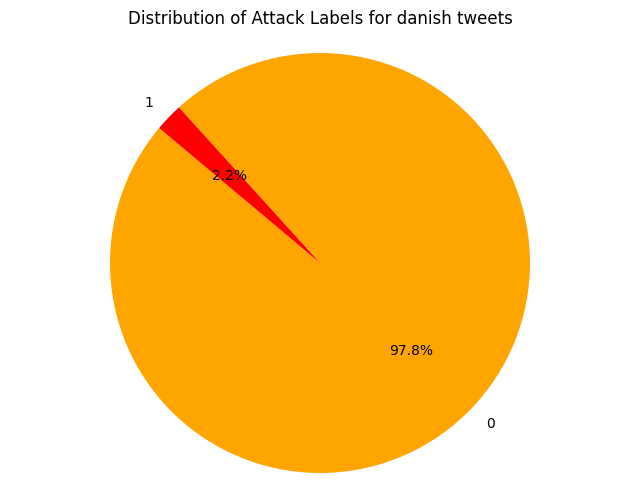

In [19]:
#pie chart of attack label
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = scored_tweets['attack'].value_counts()

# Define a color map for emotion categories
color_map = {
    1: 'red',
    0: 'orange'}

# Plotting the pie chart for all
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=[color_map[label] for label in label_counts.index])
plt.title('Distribution of Attack Labels for danish tweets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


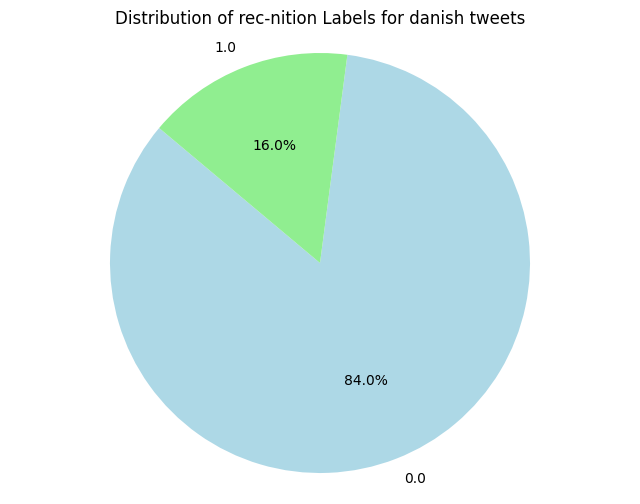

In [20]:
#pie chart of rec-nition label 

label_counts = scored_tweets['rec-nition'].value_counts()

# Define a color map for emotion categories
color_map = {
    1: 'lightgreen',
    0: 'lightblue'}

# Plotting the pie chart for all
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=[color_map[label] for label in label_counts.index])
plt.title('Distribution of rec-nition Labels for danish tweets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [21]:
# Count how many post we have for each year:
#make a new column with year based on the first 4 charcahters 
scored_tweets['year'] = scored_tweets['created_at'].str[:4]
#count how many tweets for each year
scored_tweets['year'].value_counts().sort_index()


year
2007        12
2008       308
2009      4660
2010     11295
2011     31510
2012     63228
2013     83449
2014    114649
2015    133266
2016    117387
2017    110210
2018    114788
2019    139447
2020    161949
2021    193559
2022     35302
Name: count, dtype: int64

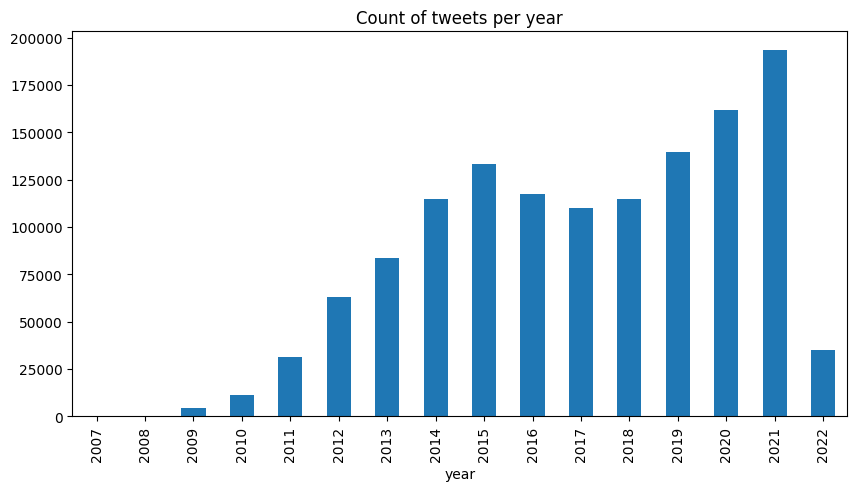

In [22]:
#Make a plot with count of posts on y and the year on x (how many tweets for each year)
ax = scored_tweets['year'].value_counts().sort_index() \
    .plot(kind= 'bar',
    title= 'Count of tweets per year',
    figsize= (10,5))
ax.set_xlabel('year')
plt.show()

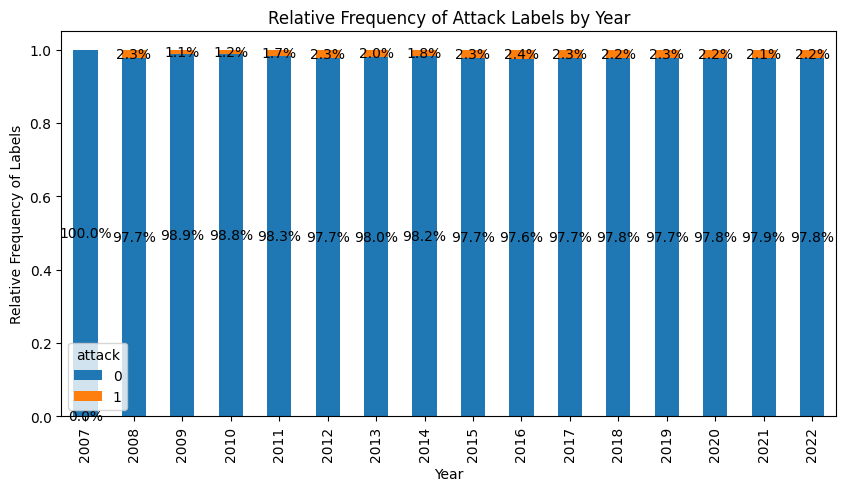

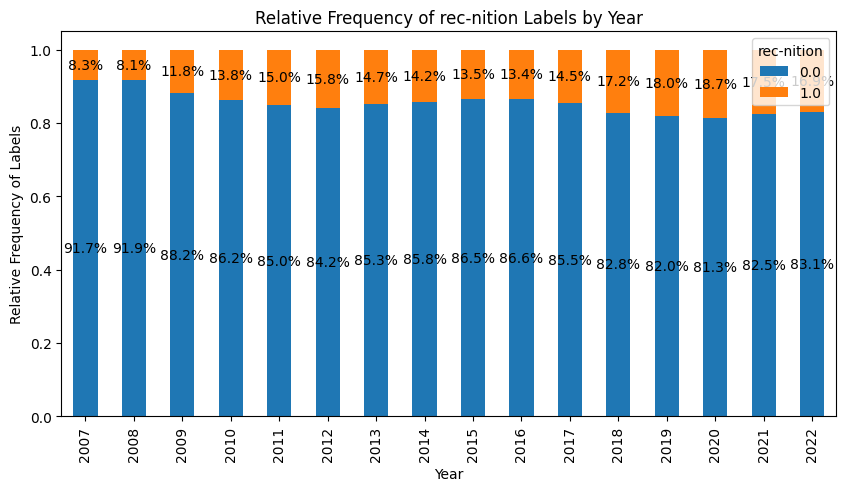

In [23]:
# Plot the distibution of labels over the years

#attack
# Calculate relative frequencies of attack labels (0 and 1) for each year
grouped = scored_tweets.groupby('year')['attack'].value_counts(normalize=True).unstack().fillna(0)

# Plotting
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 5), title='Relative Frequency of Attack Labels by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Relative Frequency of Labels')

# Annotate the bars with percentages
for container in ax.containers:
    ax.bar_label(container, labels=[f'{h*100:.1f}%' for h in container.datavalues], label_type='center')

plt.show()

#rec-nition
# Calculate relative frequencies of attack labels (0 and 1) for each year
grouped = scored_tweets.groupby('year')['rec-nition'].value_counts(normalize=True).unstack().fillna(0)

# Plotting
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 5), title='Relative Frequency of rec-nition Labels by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Relative Frequency of Labels')

# Annotate the bars with percentages
for container in ax.containers:
    ax.bar_label(container, labels=[f'{h*100:.1f}%' for h in container.datavalues], label_type='center')

plt.show()